In [2]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import datetime
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
BIGB = SkyCoord(ra=70.66917*u.degree, dec=61.67750*u.degree, frame='icrs')
print BIGB

<SkyCoord (ICRS): (ra, dec) in deg
    ( 70.66917,  61.6775)>


In [7]:
# define MAGIC Location
MAGIC = EarthLocation(lat=28.76194*u.deg, lon=-17.89*u.deg, height=2200*u.m)
utcoffsetSummer = +1*u.hour
utcoffsetWinter = 0*u.hour 

# For plotting a month we will suppose it's a winter month, that is, no offset
#time = Time('2017-6-13 23:00:00') - utcoffsetSummer

time = Time('2017-01-10 23:00:00') + utcoffsetWinter

# BIGB coordinates in MAGIC Horizontal Coordinate System
BIGB_altaz = BIGB.transform_to(AltAz(obstime=time,location=MAGIC))  
"BIGB's Altitude = {0.alt:.2}".format(BIGB_altaz)  

"BIGB's Altitude = 5.7e+01 deg"

In [5]:
from astropy.coordinates import get_moon
from astropy.coordinates import get_sun




In [6]:
midnight = Time('2017-12-1 00:00:00') + utcoffsetWinter

# create an array of times from midnight of the first day to midnight of the last. December has 31 days
delta_midnight = np.linspace(0, 744, 10000)*u.hour
times = midnight + delta_midnight
# MAGIC Horizontal Coordinate system
altazframe = AltAz(obstime=times, location=MAGIC)
# Moons's position in it
moonaltazs = get_moon(times).transform_to(altazframe)
# Sun's position in it
sunaltazs = get_sun(times).transform_to(altazframe)

BIGB_altazs = BIGB.transform_to(altazframe)  



KeyboardInterrupt: 

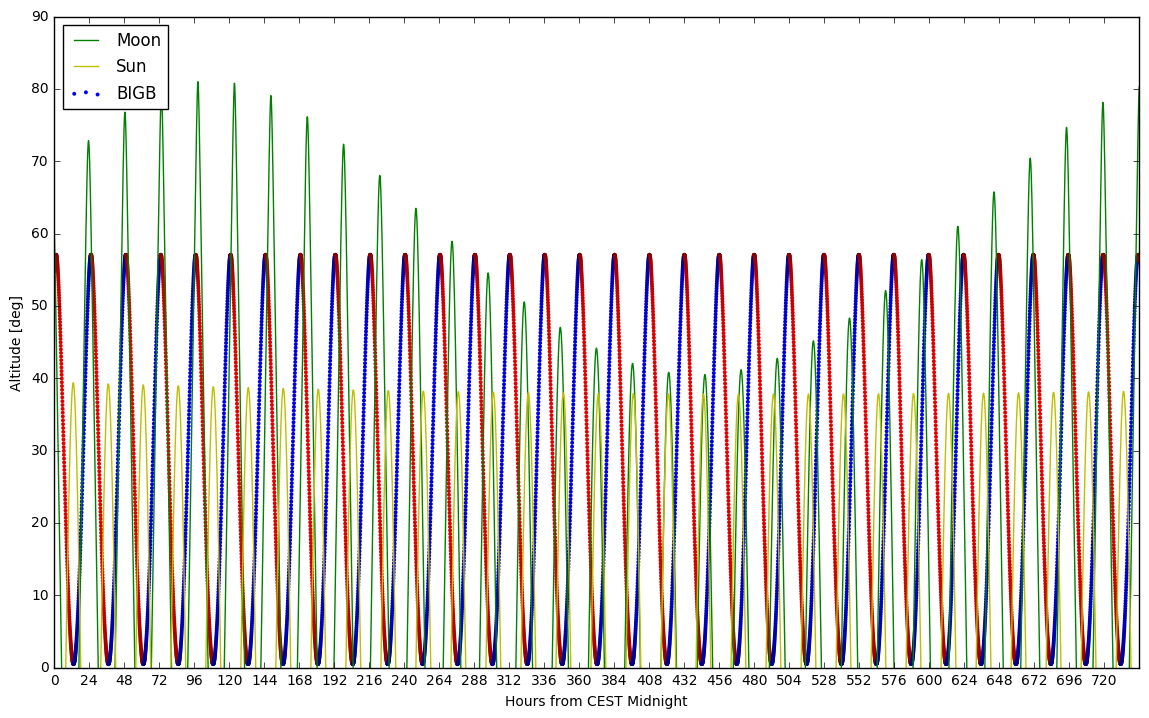

In [63]:
fig1 = plt.figure(figsize=(14, 8.4))
plt.plot(delta_midnight, moonaltazs.alt, color='g', label='Moon')  
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight, BIGB_altazs.alt, c=BIGB_altazs.az, label='BIGB', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
#plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < 0*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 744)  
plt.xticks(np.arange(0,744,24))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()

In [64]:
midnight = Time('2017-08-1 00:00:00') - utcoffsetSummer
# create an array of times from midnight of the first day to midnight of the last. August has 31 days
delta_midnight = np.linspace(0, 744, 10000)*u.hour
times = midnight + delta_midnight
# MAGIC Horizontal Coordinate system
altazframe = AltAz(obstime=times, location=MAGIC)
# Moons's position in it
moonaltazs = get_moon(times).transform_to(altazframe)
# Sun's position in it
sunaltazs = get_sun(times).transform_to(altazframe)

BIGB_altazs = BIGB.transform_to(altazframe)  


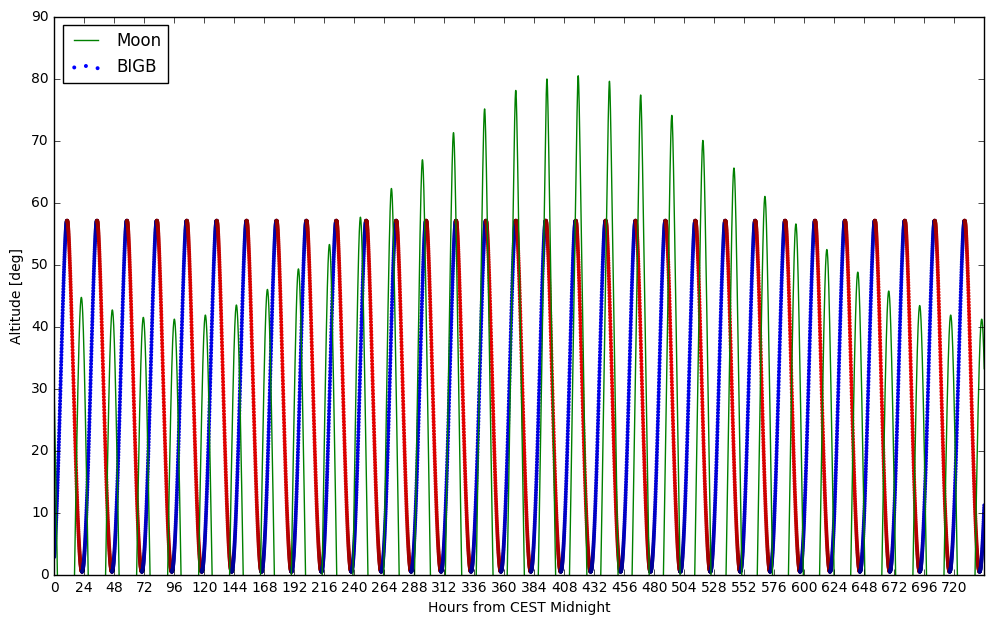

In [65]:
fig2 = plt.figure(figsize=(12, 7.2))
plt.plot(delta_midnight, moonaltazs.alt, color='g', label='Moon')  
#plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight, BIGB_altazs.alt, c=BIGB_altazs.az, label='BIGB', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
#plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < 0*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 744)  
plt.xticks(np.arange(0,744,24))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()

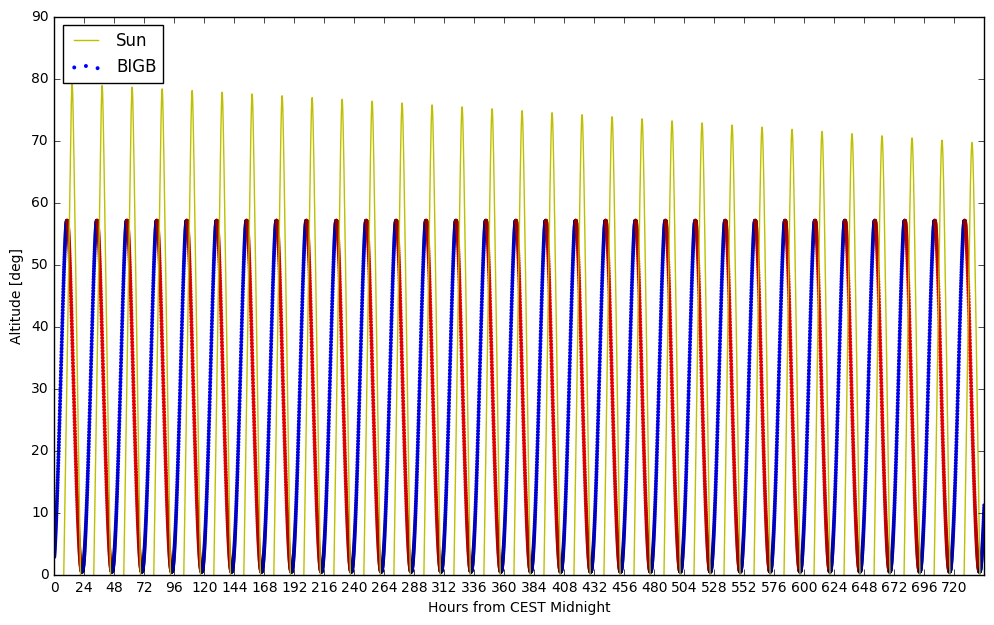

In [66]:
fig3 = plt.figure(figsize=(12, 7.2))
#plt.plot(delta_midnight, moonaltazs.alt, color='g', label='Moon')  
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight, BIGB_altazs.alt, c=BIGB_altazs.az, label='BIGB', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
#plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < 0*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 744)  
plt.xticks(np.arange(0,744,24))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()

In [98]:
midnight1 = Time('2017-01-1 00:00:00') - utcoffsetWinter
midnight2 = Time('2017-03-26 03:00:00') + utcoffsetSummer
midnight3 = Time('2017-10-29 02:00:00') - utcoffsetWinter
# now we need to distinguish between the summer and winter time.
delta_midnight1 = np.linspace(0, 2018, 10000)*u.hour
delta_midnight2 = np.linspace(0, 5208, 10000)*u.hour
delta_midnight3 = np.linspace(0, 1534, 10000)*u.hour

times1 = midnight1 + delta_midnight1
times2 = midnight2 + delta_midnight2
times3 = midnight1 + delta_midnight3
#times = [times1, times2, times3]


In [99]:
# MAGIC Horizontal Coordinate system
altazframe1 = AltAz(obstime=times1, location=MAGIC)
# Moons's position in it
moonaltazs1 = get_moon(times1).transform_to(altazframe1)
# Sun's position in it
sunaltazs1 = get_sun(times1).transform_to(altazframe1)

BIGB_altazs1 = BIGB.transform_to(altazframe1)  
print BIGB_altazs1.alt
print delta_midnight1
print(len(delta_midnight1))
print(len(BIGB_altazs1.alt))

[u'56d07m36.3627s' u'55d36m20.7388s' u'54d58m44.1822s' ...,
 u'12d57m14.866s' u'11d50m18.3694s' u'10d45m46.9666s']
[  0.00000000e+00   2.01820182e-01   4.03640364e-01 ...,   2.01759636e+03
   2.01779818e+03   2.01800000e+03] h
10000
10000


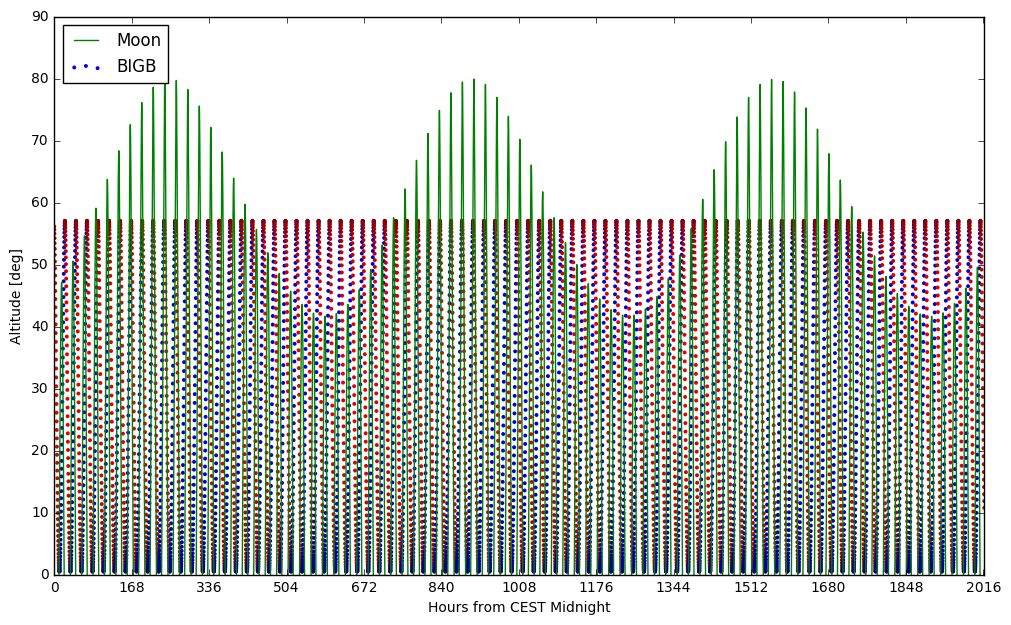

In [100]:
fig4 = plt.figure(figsize=(12, 7.2))
plt.plot(delta_midnight1, moonaltazs1.alt, color='g', label='Moon')  
#plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight1, BIGB_altazs1.alt, c=BIGB_altazs1.az, label='BIGB', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
#plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < 0*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 2018)  
plt.xticks(np.arange(0,2018,168))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()

In [101]:
midnight = Time('2017-01-1 00:00:00') - utcoffsetWinter
midnight2 = Time('2017-03-26 03:00:00') + utcoffsetSummer
midnight3 = Time('2017-10-29 02:00:00') - utcoffsetWinter
# now we need to distinguish between the summer and winter time.
#delta_midnight1 = np.linspace(0, 2018, 10000)*u.hour
#delta_midnight2 = np.linspace(2018, 7226, 10000)*u.hour
#delta_midnight3 = np.linspace(7226, 8760, 10000)*u.hour

#times1 = midnight + delta_midnight1
#times2 = midnight + delta_midnight2
#times3 = midnight + delta_midnight3
#times = midnight + delta_midnight1 + delta_midnight2 + delta_midnight3
#times = np.concatenate((times1, times2, times3), axis=0)
#delta_midnight = np.concatenate((delta_midnight1, delta_midnight2, delta_midnight3), axis=0)
delta_midnight = np.linspace(0,8760,30000)*u.hour
times = midnight + delta_midnight

In [102]:
# MAGIC Horizontal Coordinate system
altazframe = AltAz(obstime=times, location=MAGIC)
# Moons's position in it
moonaltazs = get_moon(times, location=MAGIC).transform_to(altazframe)
# Sun's position in it
sunaltazs = get_sun(times).transform_to(altazframe)

BIGB_altazs = BIGB.transform_to(altazframe)  
#print BIGB_altazs.alt
#print delta_midnight
#print(len(delta_midnight))
#print(len(BIGB_altazs.alt))

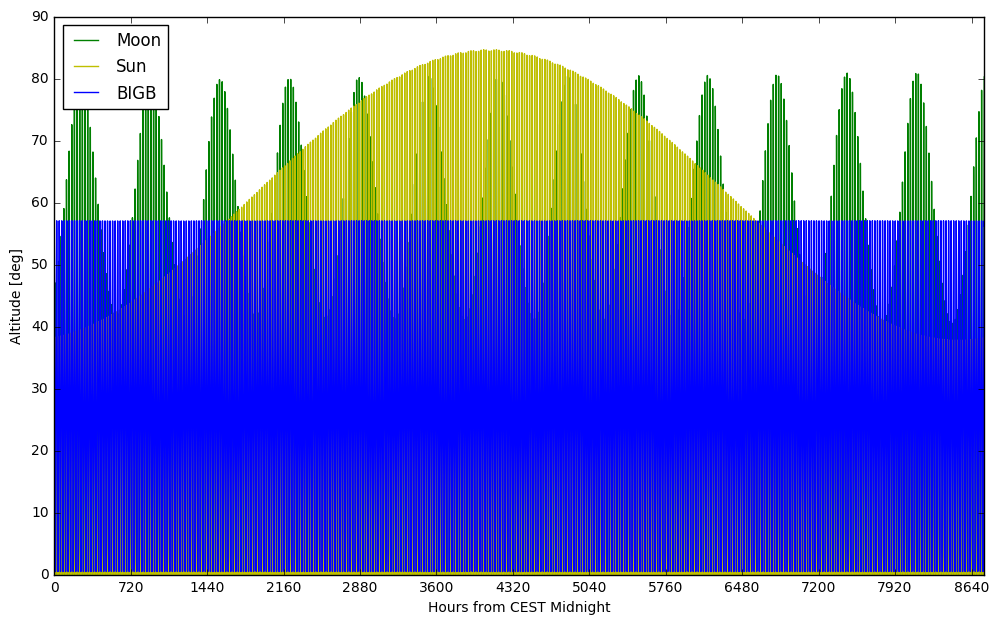

In [103]:
fig6 = plt.figure(figsize=(12, 7.2))
plt.plot(delta_midnight, moonaltazs.alt, color='g', label='Moon')  
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.plot(delta_midnight, BIGB_altazs.alt, label='BIGB')  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
#plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < 0*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 8760)  
plt.xticks(np.arange(0,8760,720))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()

In [18]:
midnight4 = Time('2017-7-21 00:00:00') + utcoffsetSummer
# create an array of times from 12h before to 12 after midnight
delta_midnight4 = np.linspace(0, 24, 1e2)*u.hour
times4 = midnight4 + delta_midnight4
print times4 
# MAGIC Horizontal Coordinate system
altazframe4 = AltAz(obstime=times4, location=MAGIC)
# Moon's position in it
moonaltazs4 = get_moon(times4).transform_to(altazframe4)

# Sun's position in it
sunaltazs4 = get_sun(times4).transform_to(altazframe4)
BIGB_altazs4 = BIGB.transform_to(altazframe4)  


['2017-07-21 01:00:00.000' '2017-07-21 01:14:32.727'
 '2017-07-21 01:29:05.455' '2017-07-21 01:43:38.182'
 '2017-07-21 01:58:10.909' '2017-07-21 02:12:43.636'
 '2017-07-21 02:27:16.364' '2017-07-21 02:41:49.091'
 '2017-07-21 02:56:21.818' '2017-07-21 03:10:54.545'
 '2017-07-21 03:25:27.273' '2017-07-21 03:40:00.000'
 '2017-07-21 03:54:32.727' '2017-07-21 04:09:05.455'
 '2017-07-21 04:23:38.182' '2017-07-21 04:38:10.909'
 '2017-07-21 04:52:43.636' '2017-07-21 05:07:16.364'
 '2017-07-21 05:21:49.091' '2017-07-21 05:36:21.818'
 '2017-07-21 05:50:54.545' '2017-07-21 06:05:27.273'
 '2017-07-21 06:20:00.000' '2017-07-21 06:34:32.727'
 '2017-07-21 06:49:05.455' '2017-07-21 07:03:38.182'
 '2017-07-21 07:18:10.909' '2017-07-21 07:32:43.636'
 '2017-07-21 07:47:16.364' '2017-07-21 08:01:49.091'
 '2017-07-21 08:16:21.818' '2017-07-21 08:30:54.545'
 '2017-07-21 08:45:27.273' '2017-07-21 09:00:00.000'
 '2017-07-21 09:14:32.727' '2017-07-21 09:29:05.455'
 '2017-07-21 09:43:38.182' '2017-07-21 09:58:1

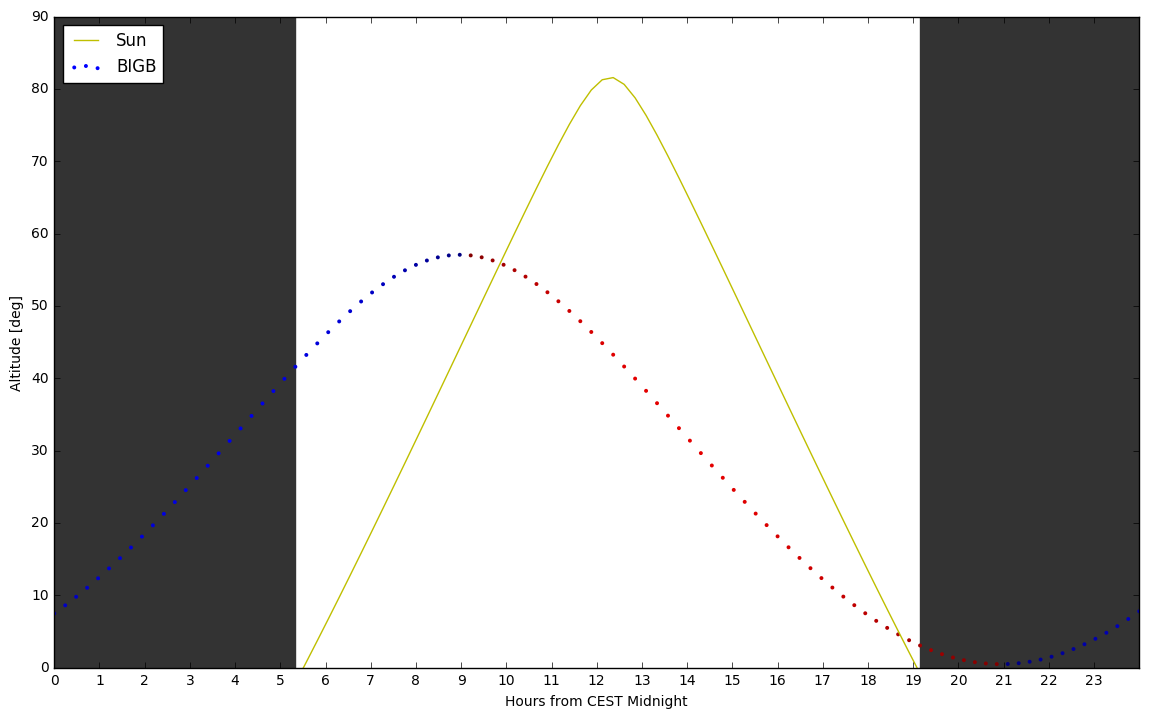

In [19]:
figu = plt.figure(figsize=(14, 8.4))
#plt.plot(delta_midnight4, moonaltazs4.alt, color='g', label='Moon')  
plt.plot(delta_midnight4, sunaltazs4.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight4, BIGB_altazs4.alt, c=BIGB_altazs4.az, label='BIGB', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
plt.fill_between(delta_midnight4.to('hr').value, 0, 90, sunaltazs4.alt < 0*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 24)  
plt.xticks(np.arange(0,24,1))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()

In [10]:
midnight = Time('2016-12-31 00:00:00') + utcoffsetWinter
# create an array of times from 12h before to 12 after midnight
delta_midnight = np.linspace(0,8760,8760)*u.hour
times = midnight + delta_midnight
days = np.split(times,365)

# MAGIC Horizontal Coordinate system
altazframe = AltAz(obstime=times, location=MAGIC)
# Moon's position in it
moonaltazs = get_moon(times).transform_to(altazframe)

# Sun's position in it
sunaltazs = get_sun(times).transform_to(altazframe)
BIGB_altazs = BIGB.transform_to(altazframe)  



In [11]:
print times
print len(times)
print len(BIGB_altazs.alt)

['2016-12-31 00:00:00.000' '2016-12-31 01:00:00.411'
 '2016-12-31 02:00:00.822' ..., '2017-12-30 21:59:58.178'
 '2017-12-30 22:59:58.589' '2017-12-30 23:59:59.000']
8760
8760


In [12]:
year = np.linspace(0,365,365)*u.day
BIGB_spl = np.split(BIGB_altazs,365)
#rint BIGB_altazs.alt
#rint BIGB_altazs.az
print BIGB_spl[1]
print len(BIGB_spl)
print len(BIGB_spl[1])

<SkyCoord (AltAz: obstime=['2017-01-01 00:00:08.864' '2017-01-01 01:00:09.275'
 '2017-01-01 02:00:09.686' '2017-01-01 03:00:10.097'
 '2017-01-01 04:00:10.508' '2017-01-01 05:00:10.919'
 '2017-01-01 06:00:11.330' '2017-01-01 07:00:11.741'
 '2017-01-01 08:00:12.152' '2017-01-01 09:00:12.563'
 '2017-01-01 10:00:12.974' '2017-01-01 11:00:13.385'
 '2017-01-01 12:00:13.796' '2017-01-01 13:00:14.207'
 '2017-01-01 14:00:14.618' '2017-01-01 15:00:15.029'
 '2017-01-01 16:00:15.440' '2017-01-01 17:00:15.851'
 '2017-01-01 18:00:16.262' '2017-01-01 19:00:16.673'
 '2017-01-01 20:00:17.084' '2017-01-01 21:00:17.495'
 '2017-01-01 22:00:17.906' '2017-01-01 23:00:18.317'], location=(5326859.905561346, -1719502.2243835523, 3051856.3455544477) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    [( 349.88259377,  56.12107257), ( 339.29540894,  52.56158546),
     ( 332.23267323,  47.08944342), ( 328.45406295,  40.51666378),
     ( 327.27324348,  33.465416

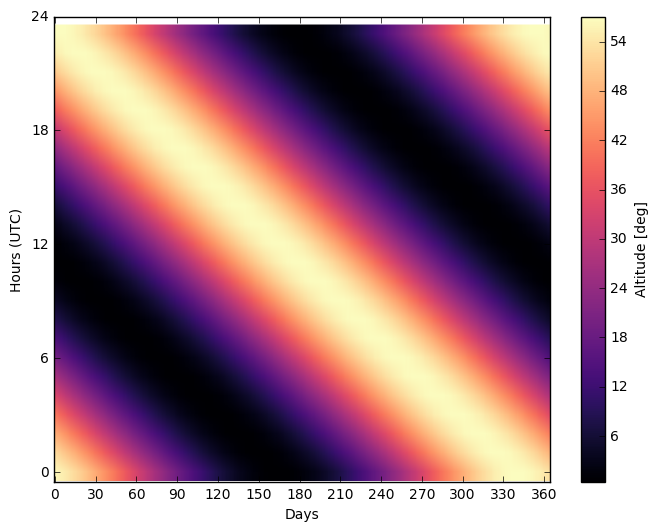

In [14]:
B=np.zeros((24,365))
for i in range(365):
    B[:,i]=BIGB_spl[i].alt

    
fig7 = plt.figure(figsize=(8,6))
    
plt.imshow(B,origin='lower',cmap=cm.magma, aspect='auto')
plt.colorbar().set_label('Altitude [deg]')
plt.xticks(np.arange(0,365,30))
plt.yticks(np.arange(0,25,6))   
plt.xlabel('Days')  
plt.ylabel('Hours (UTC)')
plt.show()


In [80]:
print BIGB_spl[0].alt
print BIGB_altazs.alt

[u'56d16m22.2756s' u'52d52m31.4631s' u'47d30m22.7056s' u'40d59m11.5525s'
 u'33d57m07.3184s' u'26d51m50.9405s' u'20d04m46.0678s' u'13d54m10.5655s'
 u'8d36m55.8324s' u'4d28m45.5874s' u'1d43m25.6665s' u'0d31m04.6032s'
 u'0d56m26.3111s' u'2d57m49.9458s' u'6d27m32.0055s' u'11d13m17.46s'
 u'17d00m09.5427s' u'23d31m47.3524s' u'30d30m41.9333s' u'37d37m17.3889s'
 u'44d27m24.7832s' u'50d28m27.7427s' u'54d55m59.096s' u'56d59m20.4833s']
[u'56d16m22.2756s' u'52d52m31.4631s' u'47d30m22.7056s' ...,
 u'54d37m55.3808s' u'56d55m21.3111s' u'56d18m26.9286s']


In [81]:
moon_spl = np.split(moonaltazs,365)
sun_spl = np.split(sunaltazs,365)

M=np.zeros((24,365))
for i in range(365):
    M[:,i]=moon_spl[i].alt
    
S=np.zeros((24,365))
for i in range(365):
    S[:,i]=sun_spl[i].alt

In [133]:
for i in range(24):
    for j in range(365):
        if S[i,j]>0:
            B[i,j]=0

In [134]:
print S[15,180]
print B[15,180]

59.3484247602
0.0


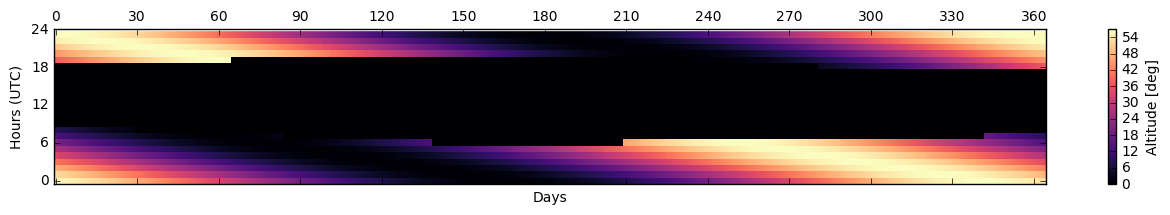

In [135]:
plt.matshow(B,origin='lower',cmap=cm.magma, aspect='auto')
plt.colorbar().set_label('Altitude [deg]')
plt.xticks(np.arange(0,365,30))
plt.yticks(np.arange(0,25,6))   
plt.xlabel('Days')  
plt.ylabel('Hours (UTC)')
plt.show()
